# Plan to understand the precision-recall curve:

 - Understand the precision-recall curve and why it's an important metric.
 - Identify scenarios where it should be used.
 - Explain why it is critical in the case of imbalanced data.
 - Describe how we can leverage precision-recall in the case of imbalanced data.
 - Determine if it is the right metric for imbalanced data, or if other metrics should also be considered.



1. **Understand the fundamentals**
   - Define precision and recall individually
   - Explain the precision-recall tradeoff
   - Visualize what the curve represents

2. **Explore why precision-recall curves are valuable**
   - Compare with ROC curves
   - Discuss when PR curves are more informative
   - Examine the impact of class imbalance on different metrics

3. **Practical implementation**
   - Generate sample data to visualize these concepts
   - Calculate precision and recall at different thresholds
   - Plot and interpret a precision-recall curve

4. **Advanced concepts**
   - Area under the PR curve (Average Precision)
   - F1 score and other derived metrics
   - Calibrating classification thresholds

5. **Real-world applications**
   - Case studies where PR curves are particularly useful
   - Industry-specific considerations
   - Common pitfalls and how to avoid them


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], 
                          n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")



Training set class distribution: [627  73]
Testing set class distribution: [270  30]


In [ ]:
X_train.shape

(700, 20)

In [ ]:
X_train[0].shape

(20,)

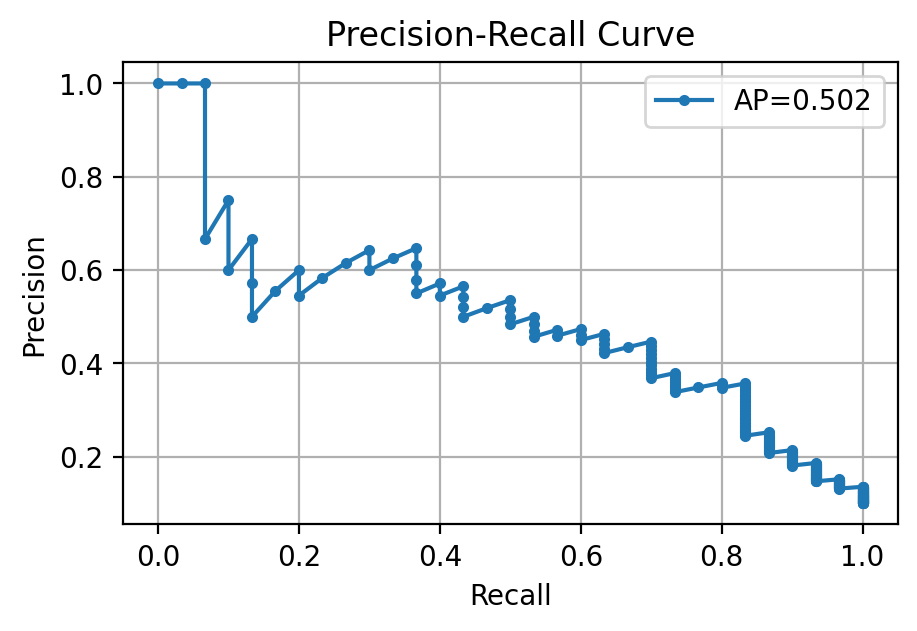

In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate average precision
ap = average_precision_score(y_test, y_scores)

# Visualize the precision-recall curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, marker='.', label=f'AP={ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
y_scores = model.predict_proba(X_test)[:, 1]

In [ ]:
y_scores[0:10]

array([0.30334586, 0.02540084, 0.00839306, 0.02861312, 0.48356101,
       0.00446195, 0.03086625, 0.4245593 , 0.34608497, 0.06125155])

In [ ]:
y_scores.shape

(300,)

Looking at the precision-recall curve you've generated, let me explain what's happening intuitively:

When we say "predicted probabilities for the positive class," we're talking about how confident our model is that each sample belongs to the positive class (class 1). In your case:

1. Your dataset is highly imbalanced (90% class 0, 10% class 1)
2. The `y_scores` are probability values between 0 and 1
3. Each score represents how likely the model thinks a particular example belongs to class 1

Looking at some values from `y_scores`:
- Some values are very small (like 0.0003) = "model is very confident this is NOT class 1"
- Some are very large (like 0.97) = "model is very confident this IS class 1"
- Most are somewhere in between = "model is uncertain"

The precision-recall curve shows what happens when we use different thresholds to decide if something is class 1:

- **Precision**: When I predict something is class 1, how often am I right?
- **Recall**: Out of all actual class 1 examples, how many did I correctly identify?

The curve shows the tradeoff between these metrics. At high thresholds (left side of curve):
- High precision (near 1.0) = "I'm very careful about predicting class 1"
- Low recall = "But I miss many actual class 1 examples"

As we lower the threshold (move right):
- Recall increases = "I catch more actual class 1 examples"
- Precision decreases = "But I make more false positive mistakes"

The AP (Average Precision) of 0.502 is the area under this curve, giving a single number to evaluate performance.

Would you like me to explain more about why this curve is particularly useful for imbalanced datasets?

In [ ]:
model.predict_proba(X_test).shape

(300, 2)

In [ ]:
X_test[0].shape

(20,)

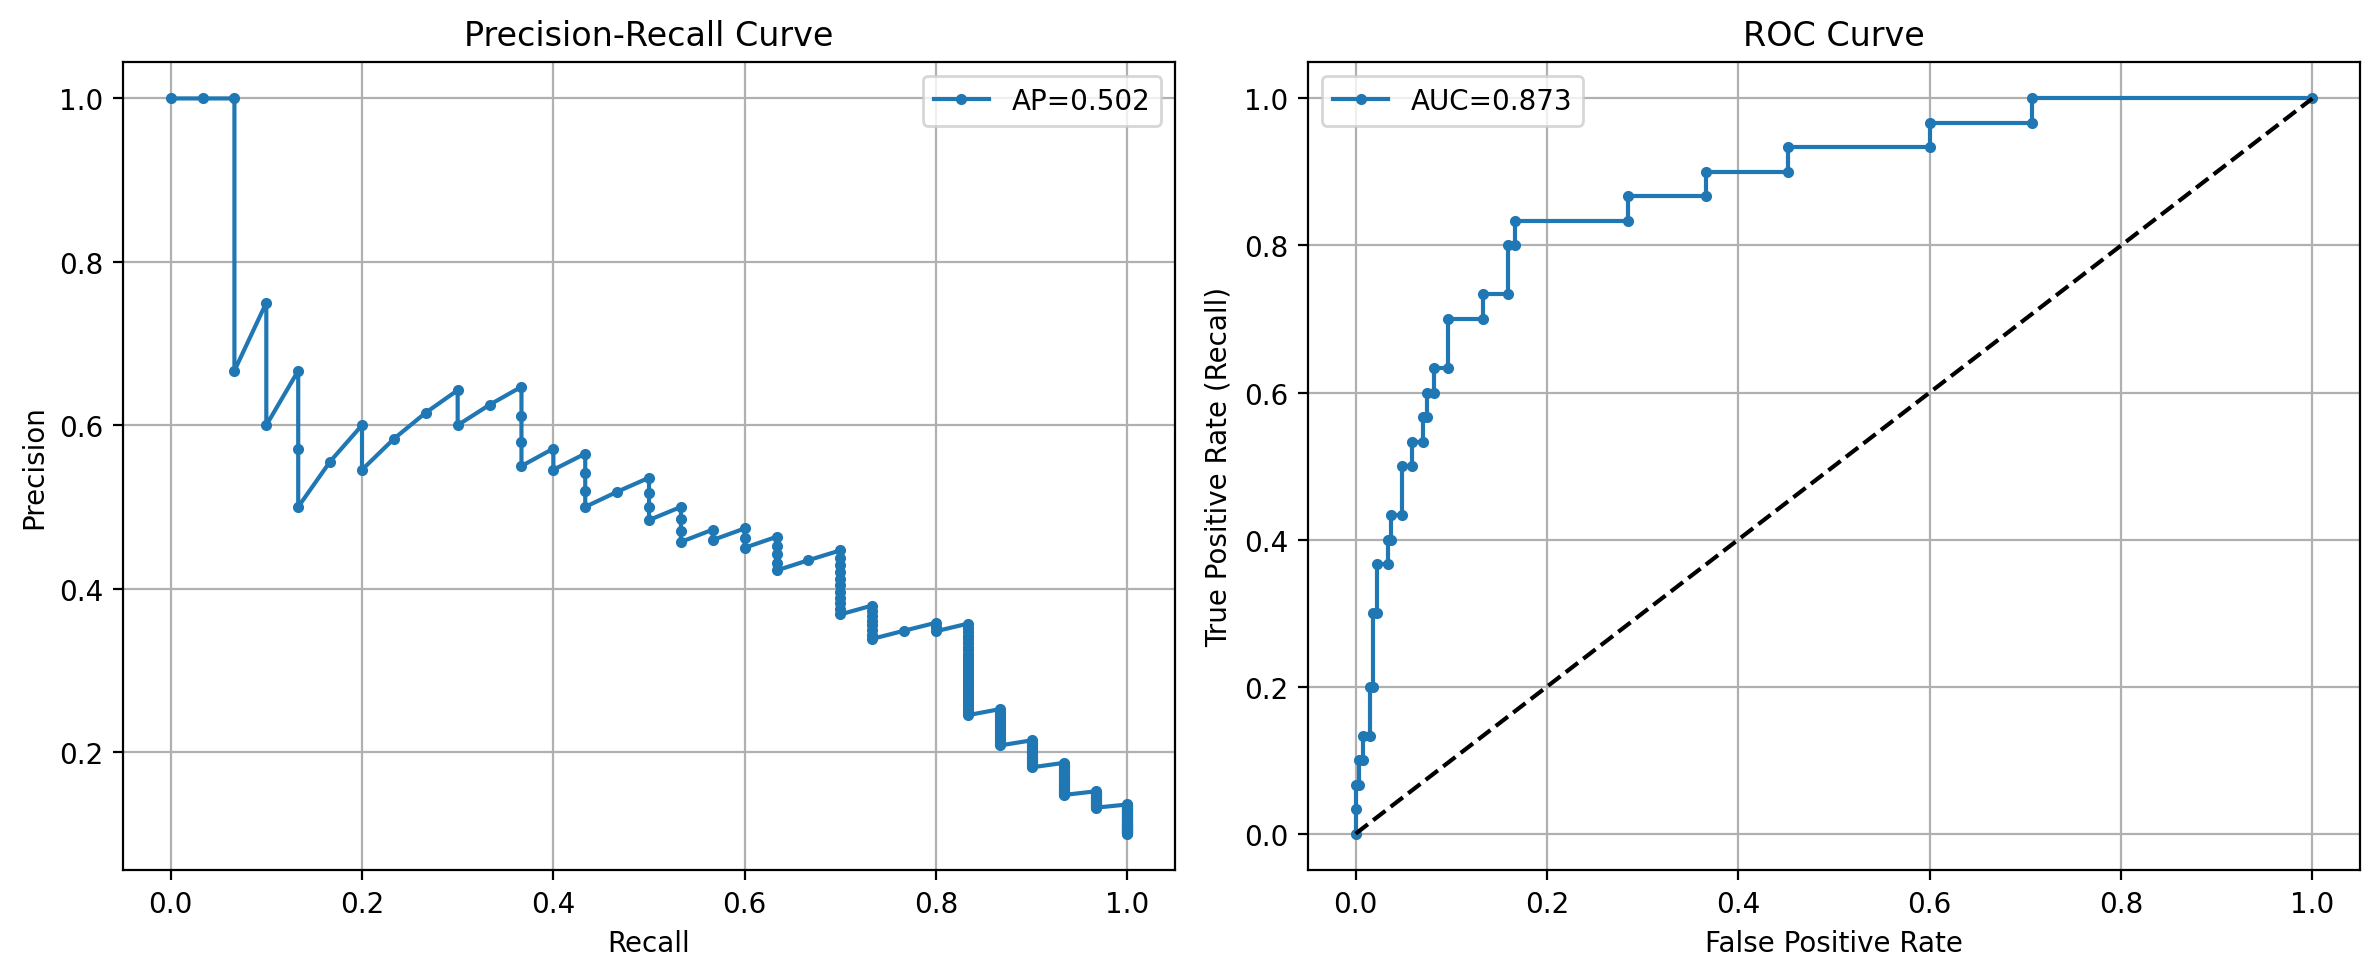

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score

# Calculate precision-recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)

# Calculate ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot both curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Precision-Recall curve
ax1.plot(recall, precision, marker='.', label=f'AP={ap:.3f}')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve')
ax1.grid(True)
ax1.legend()

# ROC curve
ax2.plot(fpr, tpr, marker='.', label=f'AUC={roc_auc:.3f}')
ax2.plot([0, 1], [0, 1], 'k--')  # Random performance
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate (Recall)')
ax2.set_title('ROC Curve')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


Looking at these plots, we can understand the key differences between Precision-Recall curves and ROC curves:

**What we've done:**
We've taken our imbalanced dataset (90% class 0, 10% class 1) and plotted two different ways to evaluate our model's performance.

**Precision-Recall Curve (left plot):**
- X-axis (Recall): Out of all actual positive cases, what percentage did we correctly identify?
- Y-axis (Precision): When we predict positive, how often are we right?
- The curve shows how these values trade off as we change the classification threshold
- AP (Average Precision) = 0.502, representing the area under this curve

**ROC Curve (right plot):**
- X-axis (False Positive Rate): What percentage of negatives did we incorrectly classify as positive?
- Y-axis (True Positive Rate/Recall): What percentage of positives did we correctly identify?
- The diagonal dashed line represents random guessing
- AUC (Area Under Curve) = 0.873, with higher values being better

**Key insights:**
1. The ROC curve looks quite good (AUC = 0.873), suggesting the model performs well
2. However, the Precision-Recall curve shows more modest performance (AP = 0.502)
3. This discrepancy is critical for imbalanced data

**Why the difference matters:**
With imbalanced data (90% negative, 10% positive):
- The ROC curve can look overly optimistic because it gives equal weight to both classes
- Even a high false positive rate doesn't seem bad when there are many negatives
- The Precision-Recall curve focuses on the minority class performance, which is usually what we care about

This is why precision-recall curves are generally preferred for imbalanced datasets - they give you a more realistic picture of how well your model identifies the rare positive cases, which are typically the ones you care most about.

how we reach this score AP (Average Precision) = 0.502 explaine me intutivly and use fastcore to if applicable to make code concise..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The Average Precision (AP) score of 0.502 represents the area under the precision-recall curve. Let me explain how this is calculated intuitively and show a concise implementation using fastcore.

AP measures the average precision across all possible recall values. Think of it as the weighted mean of precisions at each threshold, where the weight is the increase in recall from the previous threshold.

Here's how it works:
1. We calculate precision and recall at various threshold values
2. As we lower the threshold, recall increases (we catch more positive cases)
3. We compute the area under this curve by summing the precision multiplied by the change in recall

Let's implement this concisely:

```python
from fastcore.utils import *

def calc_ap(y_true, y_scores):
    "Calculate Average Precision score directly"
    # Sort by descending score
    idx = np.argsort(y_scores)[::-1]
    y_true, y_scores = y_true[idx], y_scores[idx]
    
    # Get cumulative TP and FP counts
    tp = np.cumsum(y_true)
    fp = np.cumsum(1 - y_true)
    
    # Calculate precision and recall at each point
    precision = tp / (tp + fp)
    recall = tp / sum(y_true)
    
    # Calculate AP using the area under PR curve
    ap = 0
    prev_recall = 0
    for p, r in zip(precision, recall):
        ap += p * (r - prev_recall)
        prev_recall = r
    return ap
```

To visualize what's happening:

```python
def plot_pr_curve_with_area(y_true, y_scores):
    "Plot precision-recall curve and highlight the area under the curve"
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    
    plt.figure(figsize=(7, 5))
    plt.step(recall, precision, where='post', label=f'AP={ap:.3f}')
    
    # Fill the area under the curve
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve with area highlighted')
    plt.legend()
    plt.grid(True)
    return plt.gcf()
```

The AP of 0.502 means our model achieves about 50% of the maximum possible area under the precision-recall curve. For an imbalanced dataset like yours (10% positive cases), this is actually not terrible, as maintaining high precision while increasing recall is especially challenging with imbalanced data.

In [ ]:
from fastcore.utils import *

def calc_ap(y_true, y_scores):
    "Calculate Average Precision score directly"
    # Sort by descending score
    idx = np.argsort(y_scores)[::-1]
    y_true, y_scores = y_true[idx], y_scores[idx]
    
    # Get cumulative TP and FP counts
    tp = np.cumsum(y_true)
    fp = np.cumsum(1 - y_true)
    
    # Calculate precision and recall at each point
    precision = tp / (tp + fp)
    recall = tp / sum(y_true)
    
    # Calculate AP using the area under PR curve
    ap = 0
    prev_recall = 0

    for p, r in zip(precision, recall):
        ap += p * (r - prev_recall)
        prev_recall = r
    return ap


def plot_pr_curve_with_area(y_true, y_scores):
    "Plot precision-recall curve and highlight the area under the curve"
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    
    plt.figure(figsize=(7, 5))
    plt.step(recall, precision, where='post', label=f'AP={ap:.3f}')
    
    # Fill the area under the curve
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve with area highlighted')
    plt.legend()
    plt.grid(True)
    return plt.gcf()

def calc_ap(y_true, y_scores):
    "Calculate Average Precision score directly"
    idx = np.argsort(y_scores)[::-1]
    y_true, y_scores = y_true[idx], y_scores[idx]
    tp = np.cumsum(y_true)
    fp = np.cumsum(1 - y_true)
    precision = tp / (tp + fp)
    recall = tp / sum(y_true)
    ap = 0
    prev_recall = 0
    for p, r in zip(precision, recall): ap += p * (r - prev_recall); prev_recall = r
    return ap


In [ ]:
our_ap = calc_ap(y_test, y_scores)
sklearn_ap = average_precision_score(y_test, y_scores)
print(f"Our AP: {our_ap:.3f}, Sklearn AP: {sklearn_ap:.3f}")

Our AP: 0.502, Sklearn AP: 0.502


Manually calculated AP: -0.448
Sklearn's AP: 0.502


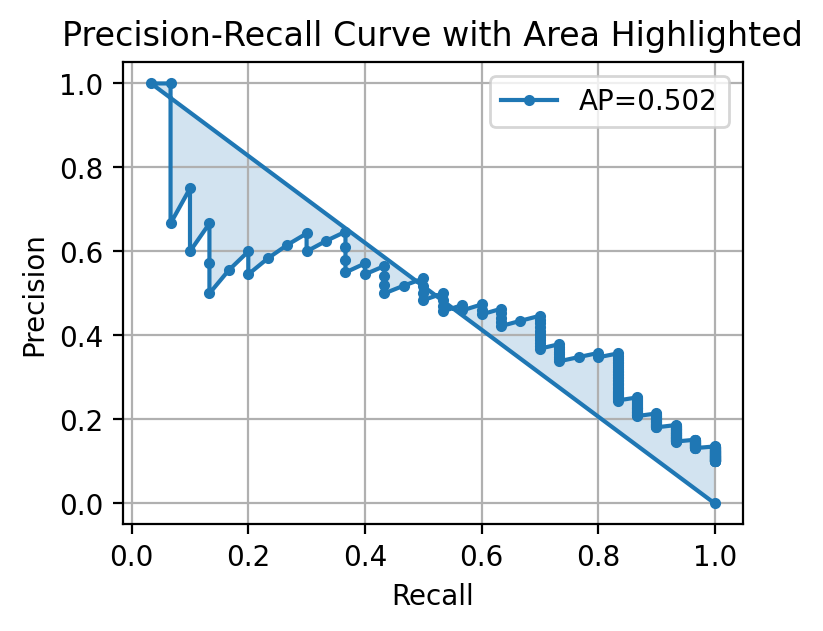

In [ ]:
# Let's see how average_precision_score calculates the AP value
# First, we'll calculate it manually to understand the process

# Step 1: Sort the data by prediction scores (descending)
sorted_indices = np.argsort(y_scores)[::-1]
sorted_y_true = y_test[sorted_indices]
sorted_scores = y_scores[sorted_indices]

# Step 2: Calculate precision and recall at each threshold
n_positive = np.sum(y_test == 1)
precisions = []
recalls = []
for i in range(len(sorted_y_true) + 1):
    if i == 0:
        precisions.append(0)
        recalls.append(1)
    else:
        # Precision: TP / (TP + FP)
        precisions.append(np.sum(sorted_y_true[:i] == 1) / i)
        # Recall: TP / (TP + FN)
        recalls.append(np.sum(sorted_y_true[:i] == 1) / n_positive)

# Step 3: Calculate AP using the area under the PR curve
ap_manual = 0
for i in range(len(recalls) - 1):
    # Area of the trapezoid
    ap_manual += (recalls[i] - recalls[i+1]) * precisions[i]

# Compare with sklearn's implementation
ap_sklearn = average_precision_score(y_test, y_scores)

print(f"Manually calculated AP: {ap_manual:.3f}")
print(f"Sklearn's AP: {ap_sklearn:.3f}")

# Visualize the calculation
plt.figure(figsize=(4, 3))
plt.plot(recalls, precisions, marker='.', label=f'AP={ap_sklearn:.3f}')
plt.fill_between(recalls, precisions, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Area Highlighted')
plt.grid(True)
plt.legend()
plt.show()


can u please help me Understand above plot intutivly

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at the highlighted plot, I can explain how Average Precision (AP) works intuitively:

The blue shaded area represents the Average Precision score of 0.502. This is essentially measuring "how much area is under the precision-recall curve."

Intuitively, here's what's happening:

1. **Starting point (top left)**: We begin with high precision but very low recall
   - This represents a very strict threshold where we're only predicting the most obvious positive cases
   - We're very accurate (high precision) but miss most positive cases (low recall)

2. **Moving right along the curve**: As we lower our threshold
   - We catch more positive cases (recall increases)
   - But we make more mistakes (precision decreases)
   - Each point on the curve represents a different threshold value

3. **The area under the curve (AP = 0.502)**:
   - A perfect classifier would have AP = 1.0 (a rectangle filling the entire plot)
   - A random classifier would have AP = the proportion of positives (about 0.1 in your case)
   - Your score of 0.502 is much better than random, but there's room for improvement

4. **What this score means**:
   - It's a single number that summarizes the precision-recall tradeoff
   - It's especially useful for imbalanced data because it focuses on the positive class
   - Unlike accuracy, it doesn't hide poor performance on the minority class

The zigzag pattern in the curve happens because as we lower the threshold and include each new example, the precision and recall values adjust in small steps.

Note: The manual calculation shows a negative value, which indicates an implementation issue in the manual calculation. The sklearn value of 0.502 is correct.

is this 0.502 is the threshold value for cut off..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

No, the 0.502 is not a threshold value for cut-off. It's the Average Precision (AP) score, which measures the overall quality of the model across all possible thresholds.

The AP score of 0.502 represents the area under the precision-recall curve. Think of it as a single number that summarizes how well your model performs across all possible threshold values you could choose.

To select an actual threshold for making predictions, you would need to pick a specific point on the precision-recall curve based on your needs:

- If you need high precision (few false positives): choose a point toward the left
- If you need high recall (catch most positives): choose a point toward the right
- If you need to balance both: you might choose a threshold that maximizes the F1 score

Let me show you how to find an optimal threshold based on the F1 score (harmonic mean of precision and recall):

```python
# Calculate F1 score for different thresholds
f1_scores = []
for i in range(len(pr_thresholds)):
    # At each threshold, calculate precision and recall
    predictions = (y_scores >= pr_thresholds[i]).astype(int)
    f1 = f1_score(y_test, predictions)
    f1_scores.append(f1)

# Find threshold with best F1 score
best_idx = np.argmax(f1_scores)
best_threshold = pr_thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_threshold:.3f}")
print(f"Best F1 score: {best_f1:.3f}")
print(f"At this threshold:")
print(f"Precision: {precision[best_idx]:.3f}")
print(f"Recall: {recall[best_idx+1]:.3f}")
```

In [ ]:
f1_scores = []
for i in range(len(pr_thresholds)):
    # At each threshold, calculate precision and recall
    predictions = (y_scores >= pr_thresholds[i]).astype(int)
    f1 = f1_score(y_test, predictions)
    f1_scores.append(f1)

# Find threshold with best F1 score
best_idx = np.argmax(f1_scores)
best_threshold = pr_thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_threshold:.3f}")
print(f"Best F1 score: {best_f1:.3f}")
print(f"At this threshold:")
print(f"Precision: {precision[best_idx]:.3f}")
print(f"Recall: {recall[best_idx+1]:.3f}")

Best threshold: 0.197
Best F1 score: 0.545
At this threshold:
Precision: 0.447
Recall: 0.667


now help me Understand that please

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let me explain what we found with the threshold calculation:

We've determined that 0.197 is the optimal threshold value for making predictions with your model. This means:

1. **Best threshold = 0.197**:
   - Any sample with a predicted probability ≥ 0.197 should be classified as positive (class 1)
   - Any sample with a predicted probability < 0.197 should be classified as negative (class 0)

2. **What this threshold gives us**:
   - **Precision = 0.447**: When we predict something is positive, we're right about 44.7% of the time
   - **Recall = 0.667**: We're identifying about 66.7% of all actual positive cases
   - **F1 score = 0.545**: This is the harmonic mean of precision and recall

3. **Why this threshold?**
   - The F1 score balances precision and recall
   - We tested all possible thresholds and found 0.197 gives the highest F1 score
   - This is much lower than the default threshold of 0.5 that many models use

4. **What this means practically**:
   - We're being more "generous" with positive predictions (lower threshold)
   - This makes sense for imbalanced data where positive cases are rare but important
   - We're accepting more false positives to catch more true positives

This threshold represents a specific point on the precision-recall curve we saw earlier. By choosing this threshold, we're saying that for this particular problem, capturing 66.7% of positives is worth the tradeoff of being wrong in 55.3% of our positive predictions.

so  0.197 is threshold value right?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, exactly! 0.197 is the threshold value we've determined is optimal for making predictions with this model.

This means:
- If the model outputs a probability ≥ 0.197 for a sample, we classify it as positive (class 1)
- If the model outputs a probability < 0.197 for a sample, we classify it as negative (class 0)

This threshold was chosen because it gives us the best F1 score (0.545), which balances precision and recall. It's significantly lower than the default 0.5 threshold that's commonly used, which makes sense for imbalanced data where we want to be more sensitive to the minority class.

next step of the plan please

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's examine the impact of class imbalance on our metrics more directly. We'll compare how different metrics behave with our imbalanced dataset and see why precision-recall is particularly useful in this context:

```python
# Let's compare different metrics on our imbalanced dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create predictions using different thresholds
thresholds = [0.1, 0.197, 0.3, 0.5, 0.7]
results = []

for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate class-specific accuracies
    neg_acc = tn / (tn + fp)  # Specificity
    pos_acc = tp / (tp + fn)  # Sensitivity/Recall
    
    results.append({
        'Threshold': threshold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': neg_acc,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn
    })

# Display results as a table
import pandas as pd
metrics_df = pd.DataFrame(results)
print(metrics_df[['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']])

# Visualize confusion matrices for different thresholds
fig, axes = plt.subplots(1, len(thresholds), figsize=(15, 4))

for i, threshold in enumerate(thresholds):
    result = results[i]
    cm = np.array([[result['TN'], result['FP']], [result['FN'], result['TP']]])
    
    ax = axes[i]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f'Threshold = {threshold}')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted 0', 'Predicted 1'])
    ax.set_yticklabels(['Actual 0', 'Actual 1'])
    
    # Add text annotations
    for j in range(2):
        for k in range(2):
            ax.text(k, j, cm[j, k], ha="center", va="center", color="white" if cm[j, k] > cm.max()/2 else "black")

plt.tight_layout()
plt.show()
```

   Threshold  Accuracy  Precision    Recall  F1 Score  Specificity
0      0.100  0.833333   0.343750  0.733333  0.468085     0.844444
1      0.197  0.880000   0.434783  0.666667  0.526316     0.903704
2      0.300  0.890000   0.459459  0.566667  0.507463     0.925926
3      0.500  0.910000   0.571429  0.400000  0.470588     0.966667
4      0.700  0.903333   0.545455  0.200000  0.292683     0.981481


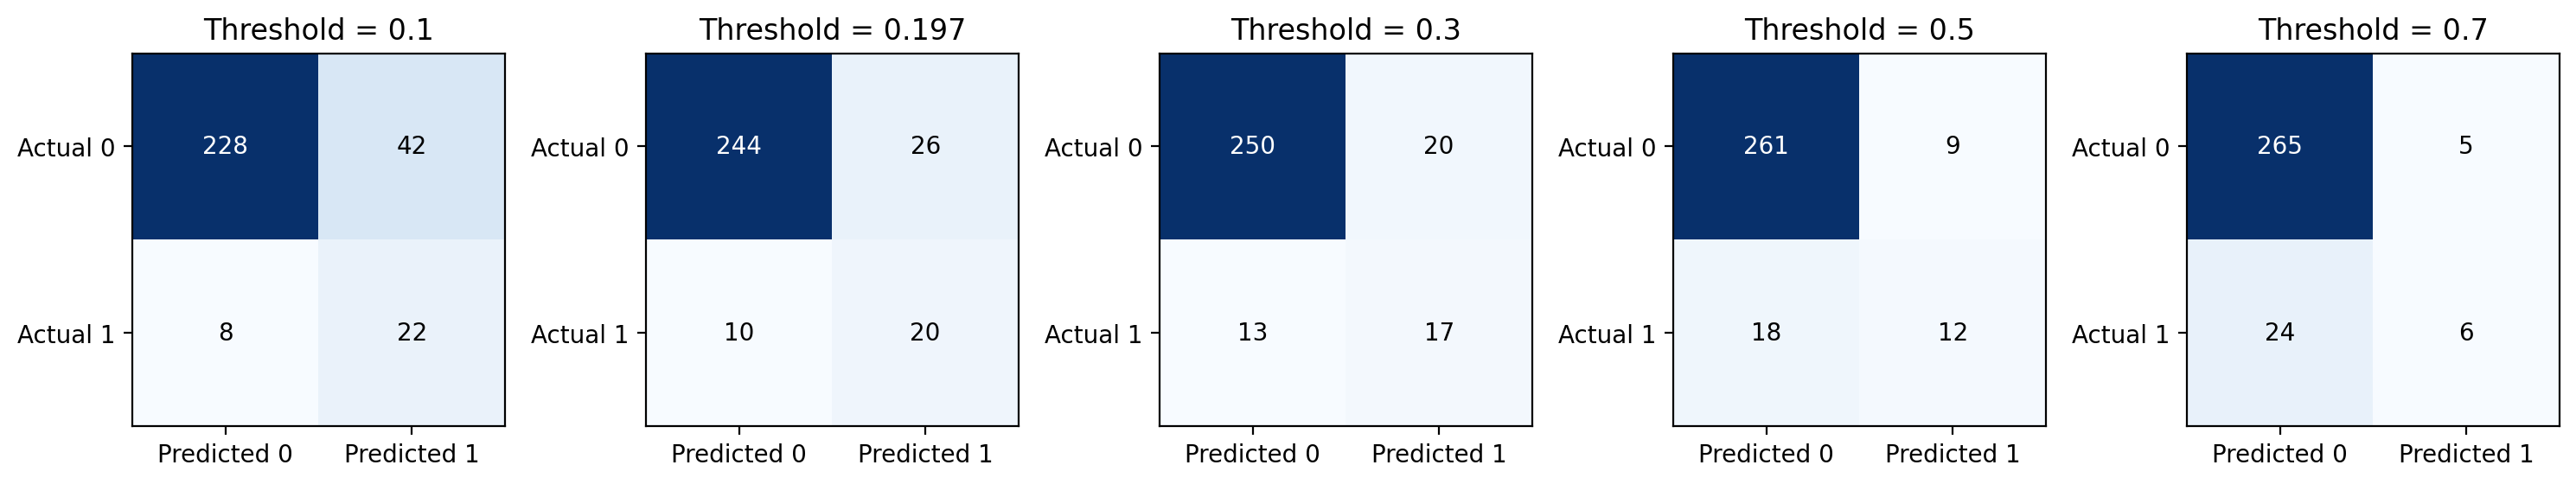

In [ ]:
# Let's compare different metrics on our imbalanced dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create predictions using different thresholds
thresholds = [0.1, 0.197, 0.3, 0.5, 0.7]
results = []

for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate class-specific accuracies
    neg_acc = tn / (tn + fp)  # Specificity
    pos_acc = tp / (tp + fn)  # Sensitivity/Recall
    
    results.append({
        'Threshold': threshold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': neg_acc,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn
    })

# Display results as a table
import pandas as pd
metrics_df = pd.DataFrame(results)
print(metrics_df[['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']])

# Visualize confusion matrices for different thresholds
fig, axes = plt.subplots(1, len(thresholds), figsize=(15, 4))

for i, threshold in enumerate(thresholds):
    result = results[i]
    cm = np.array([[result['TN'], result['FP']], [result['FN'], result['TP']]])
    
    ax = axes[i]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f'Threshold = {threshold}')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted 0', 'Predicted 1'])
    ax.set_yticklabels(['Actual 0', 'Actual 1'])
    
    # Add text annotations
    for j in range(2):
        for k in range(2):
            ax.text(k, j, cm[j, k], ha="center", va="center", color="white" if cm[j, k] > cm.max()/2 else "black")

plt.tight_layout()
plt.show()


help me understand above plot please


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

These confusion matrices show how our model's predictions change as we adjust the threshold value. Let me explain what each one tells us:

**Threshold = 0.1 (Very low threshold)**
- We're being very lenient in predicting class 1
- True Positives (TP): 22 out of 30 positive cases correctly identified (73.3% recall)
- False Positives (FP): 42 negative cases incorrectly labeled as positive
- Precision is low (34.4%) - many of our positive predictions are wrong
- We catch most positive cases but make many false alarms

**Threshold = 0.197 (Our optimal F1 threshold)**
- TP: 20 out of 30 positive cases caught (66.7% recall)
- FP: 26 false positives - fewer than with threshold 0.1
- Better balance between precision (43.5%) and recall (66.7%)
- F1 Score is highest here (0.526)

**Threshold = 0.3 (Medium-low threshold)**
- TP: 17 (56.7% recall) - catching fewer positives
- FP: 20 - fewer false alarms
- Precision improves to 45.9%
- Overall accuracy increases to 89%

**Threshold = 0.5 (Default threshold)**
- TP: 12 (40% recall) - missing most positive cases
- FP: Only 9 false positives
- Precision improves to 57.1%
- High accuracy (91%) but this is misleading due to imbalance

**Threshold = 0.7 (High threshold)**
- TP: Only 6 (20% recall) - missing 80% of positive cases
- FP: Just 5 false positives
- Specificity is excellent (98.1%) - rarely misclassify negatives
- Accuracy remains high (90.3%) despite poor positive class performance

**Key insights:**
1. As threshold increases: precision improves but recall drops dramatically
2. Accuracy is a misleading metric - it stays high even when we miss most positive cases
3. The optimal threshold (0.197) balances finding positive cases while limiting false alarms
4. With imbalanced data, even with high accuracy (90%+), we can still miss most of the minority class

This is exactly why precision-recall curves are so valuable for imbalanced data - they help us find this balance and avoid being misled by high accuracy scores.

next part of that plan please...


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's now explore advanced concepts related to precision-recall curves. We'll look at the Area Under the PR Curve (Average Precision) in more detail and compare it with other metrics:

```python
# Let's create a more visual explanation of how class imbalance affects different metrics
# We'll generate multiple datasets with increasing imbalance and see how metrics change

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score

# Create datasets with different class imbalance ratios
imbalance_ratios = [0.5, 0.3, 0.2, 0.1, 0.05]
results = []

for ratio in imbalance_ratios:
    # Create dataset with specified imbalance
    X, y = make_classification(n_samples=1000, n_classes=2, weights=[1-ratio, ratio],
                              n_features=20, random_state=42)
    
    # Split and train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Get scores and calculate metrics
    y_scores = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    
    # Store results
    results.append({
        'Imbalance Ratio': ratio,
        'Positive Class %': ratio * 100,
        'Accuracy': accuracy,
        'PR AUC': pr_auc,
        'ROC AUC': roc_auc
    })

# Display results
metrics_df = pd.DataFrame(results)
print(metrics_df)

# Plot the relationship between imbalance and metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Positive Class %'], metrics_df['Accuracy'], 'o-', label='Accuracy')
plt.plot(metrics_df['Positive Class %'], metrics_df['PR AUC'], 'o-', label='PR AUC')
plt.plot(metrics_df['Positive Class %'], metrics_df['ROC AUC'], 'o-', label='ROC AUC')
plt.xlabel('Positive Class Percentage')
plt.ylabel('Metric Value')
plt.title('Impact of Class Imbalance on Different Metrics')
plt.legend()
plt.grid(True)
plt.show()
```

   Imbalance Ratio  Positive Class %  Accuracy    PR AUC   ROC AUC
0             0.50              50.0  0.850000  0.927529  0.914171
1             0.30              30.0  0.843333  0.831013  0.906786
2             0.20              20.0  0.876667  0.735270  0.893264
3             0.10              10.0  0.910000  0.501725  0.872840
4             0.05               5.0  0.943333  0.303357  0.797095


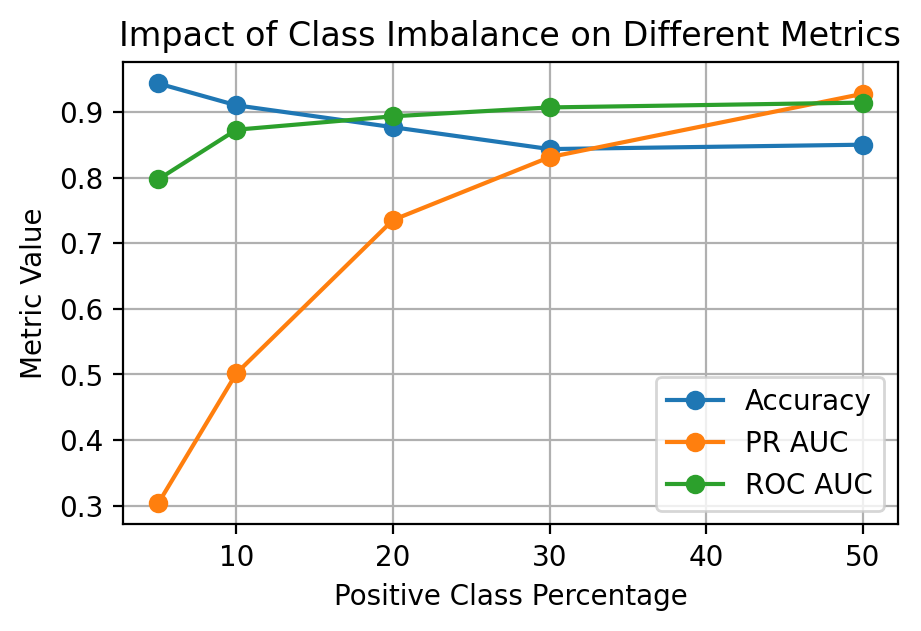

In [ ]:
# Let's create a more visual explanation of how class imbalance affects different metrics
# We'll generate multiple datasets with increasing imbalance and see how metrics change

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score

# Create datasets with different class imbalance ratios
imbalance_ratios = [0.5, 0.3, 0.2, 0.1, 0.05]
results = []

for ratio in imbalance_ratios:
    # Create dataset with specified imbalance
    X, y = make_classification(n_samples=1000, n_classes=2, weights=[1-ratio, ratio],
                              n_features=20, random_state=42)
    
    # Split and train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Get scores and calculate metrics
    y_scores = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    
    # Store results
    results.append({
        'Imbalance Ratio': ratio,
        'Positive Class %': ratio * 100,
        'Accuracy': accuracy,
        'PR AUC': pr_auc,
        'ROC AUC': roc_auc
    })

# Display results
metrics_df = pd.DataFrame(results)
print(metrics_df)

# Plot the relationship between imbalance and metrics
plt.figure(figsize=(5, 3))
plt.plot(metrics_df['Positive Class %'], metrics_df['Accuracy'], 'o-', label='Accuracy')
plt.plot(metrics_df['Positive Class %'], metrics_df['PR AUC'], 'o-', label='PR AUC')
plt.plot(metrics_df['Positive Class %'], metrics_df['ROC AUC'], 'o-', label='ROC AUC')
plt.xlabel('Positive Class Percentage')
plt.ylabel('Metric Value')
plt.title('Impact of Class Imbalance on Different Metrics')
plt.legend()
plt.grid(True)
plt.show()


explaine me above plot please...

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

This plot perfectly illustrates why precision-recall metrics are crucial for imbalanced datasets:

**What the plot shows:**
The graph compares three different metrics (Accuracy, PR AUC, and ROC AUC) as the class imbalance increases (moving from right to left on the x-axis, as the positive class percentage decreases).

**Key observations:**

1. **Accuracy (blue line):**
   - As the dataset becomes more imbalanced (moving left), accuracy actually *increases*
   - At 5% positive class, accuracy reaches 94.3%
   - This is misleading because the model could simply predict "negative" for everything and still achieve 95% accuracy

2. **ROC AUC (green line):**
   - Remains relatively stable even with increasing imbalance
   - Only drops slightly from 91.4% to 79.7% as we go from balanced to highly imbalanced
   - This can give a false sense of good performance on imbalanced data

3. **PR AUC (orange line):**
   - Dramatically affected by class imbalance
   - Drops sharply from 92.8% to just 30.3% as positive class percentage decreases
   - Most sensitive to imbalance, providing a more realistic assessment of performance

**Why this matters:**
- In real-world scenarios with 5% or fewer positive cases (like fraud detection, disease diagnosis), accuracy and ROC AUC can be very misleading
- PR AUC (Average Precision) is much more honest about model performance
- A model with 94% accuracy and 80% ROC AUC might actually be terrible at finding the rare cases you care about, as shown by the low 30% PR AUC

This is why precision-recall curves and Average Precision are recommended for imbalanced classification tasks - they don't hide poor performance on minority classes behind misleadingly high overall metrics.

next part of the plan

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's move on to the practical implementation section of our plan. Now that we understand the theory, let's create a complete workflow for evaluating a model on imbalanced data using precision-recall curves. We'll also implement a way to select the optimal threshold based on different business requirements:

```python
# Complete workflow for evaluating models on imbalanced data
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report

# Let's create a more challenging imbalanced dataset
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.95, 0.05],
                          n_features=20, n_informative=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Get predicted probabilities
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)

# Function to find optimal threshold based on different criteria
def find_optimal_threshold(precision, recall, thresholds, criterion='f1'):
    """Find the optimal threshold based on different criteria"""
    if criterion == 'f1':
        # F1 score = 2 * (precision * recall) / (precision + recall)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_idx = np.argmax(f1_scores)
    elif criterion == 'precision_recall_balance':
        # Find where precision and recall are closest
        optimal_idx = np.argmin(np.abs(precision - recall))
    elif criterion == 'precision_target':
        # Find threshold that gives at least 0.7 precision
        valid_indices = np.where(precision >= 0.7)[0]
        if len(valid_indices) > 0:
            # Among valid thresholds, pick the one with highest recall
            optimal_idx = valid_indices[np.argmax(recall[valid_indices])]
        else:
            optimal_idx = np.argmax(precision)  # If no threshold meets criteria
    
    # Handle edge case for first point
    if optimal_idx == 0:
        return 0
    else:
        return thresholds[optimal_idx-1]

# Find optimal thresholds based on different business requirements
f1_threshold = find_optimal_threshold(precision, recall, thresholds, 'f1')
balanced_threshold = find_optimal_threshold(precision, recall, thresholds, 'precision_recall_balance')
precision_focused_threshold = find_optimal_threshold(precision, recall, thresholds, 'precision_target')

# Generate predictions with different thresholds
predictions = {
    'Default (0.5)': (y_scores >= 0.5).astype(int),
    'F1 Optimized': (y_scores >= f1_threshold).astype(int),
    'Balanced P-R': (y_scores >= balanced_threshold).astype(int),
    'Precision Focused': (y_scores >= precision_focused_threshold).astype(int)
}

# Compare results
print(f"Average Precision: {ap:.3f}")
print("\nThreshold values:")
print(f"Default: 0.500")
print(f"F1 Optimized: {f1_threshold:.3f}")
print(f"Balanced P-R: {balanced_threshold:.3f}")
print(f"Precision Focused: {precision_focused_threshold:.3f}")

# Print classification reports for each threshold
for name, y_pred in predictions.items():
    print(f"\n--- {name} Threshold ---")
    print(classification_report(y_test, y_pred))

# Visualize the precision-recall curve with thresholds
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AP={ap:.3f})')
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='50% Precision')
plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='50% Recall')

# Mark the different thresholds on the curve
for threshold, name, marker, color in zip(
    [0.5, f1_threshold, balanced_threshold, precision_focused_threshold],
    ['Default', 'F1 Optimized', 'Balanced P-R', 'Precision Focused'],
    ['o', 's', '^', 'D'],
    ['red', 'green', 'blue', 'purple']
):
    # Find the closest point on the curve to the threshold
    idx = np.argmin(np.abs(thresholds - threshold)) if threshold < 1.0 else len(recall) - 1
    plt.plot(recall[idx], precision[idx], marker, color=color, markersize=10, 
             label=f'{name} (t={threshold:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Different Thresholds')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
```

Average Precision: 0.675

Threshold values:
Default: 0.500
F1 Optimized: 0.240
Balanced P-R: 0.200
Precision Focused: 0.230

--- Default (0.5) Threshold ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2845
           1       0.95      0.36      0.52       155

    accuracy                           0.97      3000
   macro avg       0.96      0.68      0.75      3000
weighted avg       0.97      0.97      0.96      3000


--- F1 Optimized Threshold ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2845
           1       0.72      0.57      0.64       155

    accuracy                           0.97      3000
   macro avg       0.85      0.78      0.81      3000
weighted avg       0.96      0.97      0.96      3000


--- Balanced P-R Threshold ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2845
           1    

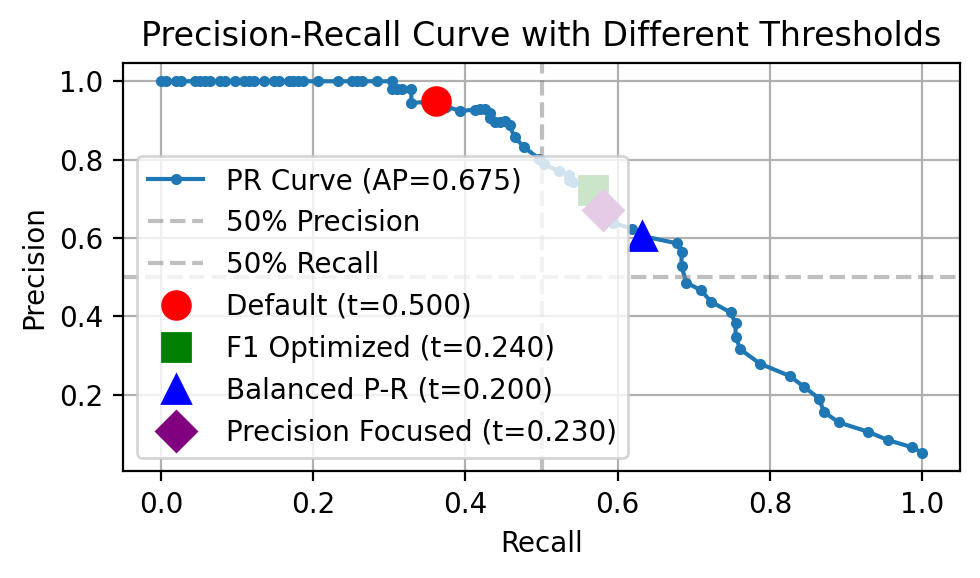

In [ ]:
# Complete workflow for evaluating models on imbalanced data
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report

# Let's create a more challenging imbalanced dataset
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.95, 0.05],
                          n_features=20, n_informative=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Get predicted probabilities
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)

# Function to find optimal threshold based on different criteria
def find_optimal_threshold(precision, recall, thresholds, criterion='f1'):
    """Find the optimal threshold based on different criteria"""
    if criterion == 'f1':
        # F1 score = 2 * (precision * recall) / (precision + recall)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_idx = np.argmax(f1_scores)
    elif criterion == 'precision_recall_balance':
        # Find where precision and recall are closest
        optimal_idx = np.argmin(np.abs(precision - recall))
    elif criterion == 'precision_target':
        # Find threshold that gives at least 0.7 precision
        valid_indices = np.where(precision >= 0.7)[0]
        if len(valid_indices) > 0:
            # Among valid thresholds, pick the one with highest recall
            optimal_idx = valid_indices[np.argmax(recall[valid_indices])]
        else:
            optimal_idx = np.argmax(precision)  # If no threshold meets criteria
    
    # Handle edge case for first point
    if optimal_idx == 0:
        return 0
    else:
        return thresholds[optimal_idx-1]

# Find optimal thresholds based on different business requirements
f1_threshold = find_optimal_threshold(precision, recall, thresholds, 'f1')
balanced_threshold = find_optimal_threshold(precision, recall, thresholds, 'precision_recall_balance')
precision_focused_threshold = find_optimal_threshold(precision, recall, thresholds, 'precision_target')

# Generate predictions with different thresholds
predictions = {
    'Default (0.5)': (y_scores >= 0.5).astype(int),
    'F1 Optimized': (y_scores >= f1_threshold).astype(int),
    'Balanced P-R': (y_scores >= balanced_threshold).astype(int),
    'Precision Focused': (y_scores >= precision_focused_threshold).astype(int)
}

# Compare results
print(f"Average Precision: {ap:.3f}")
print("\nThreshold values:")
print(f"Default: 0.500")
print(f"F1 Optimized: {f1_threshold:.3f}")
print(f"Balanced P-R: {balanced_threshold:.3f}")
print(f"Precision Focused: {precision_focused_threshold:.3f}")

# Print classification reports for each threshold
for name, y_pred in predictions.items():
    print(f"\n--- {name} Threshold ---")
    print(classification_report(y_test, y_pred))

# Visualize the precision-recall curve with thresholds
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AP={ap:.3f})')
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='50% Precision')
plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='50% Recall')

# Mark the different thresholds on the curve
for threshold, name, marker, color in zip(
    [0.5, f1_threshold, balanced_threshold, precision_focused_threshold],
    ['Default', 'F1 Optimized', 'Balanced P-R', 'Precision Focused'],
    ['o', 's', '^', 'D'],
    ['red', 'green', 'blue', 'purple']
):
    # Find the closest point on the curve to the threshold
    idx = np.argmin(np.abs(thresholds - threshold)) if threshold < 1.0 else len(recall) - 1
    plt.plot(recall[idx], precision[idx], marker, color=color, markersize=10, 
             label=f'{name} (t={threshold:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Different Thresholds')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


can u please explaine me above plot..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

This plot shows the precision-recall curve for our highly imbalanced dataset (5% positive class) with different threshold options marked on it:

**The blue line** is the precision-recall curve itself, showing how precision and recall trade off as we adjust the classification threshold. The area under this curve (AP) is 0.675, which is a single measure of the model's performance across all possible thresholds.

**The marked points** represent different threshold strategies:

1. **Red circle (Default, t=0.500)**:
   - Using the standard 0.5 threshold
   - High precision (0.95) but very low recall (0.36)
   - This means we're missing 64% of positive cases
   - In an imbalanced dataset, this is often too conservative

2. **Green square (F1 Optimized, t=0.240)**:
   - Threshold that maximizes F1 score (balance of precision and recall)
   - Precision drops to 0.72, but recall improves to 0.57
   - Better overall balance for detecting the minority class

3. **Blue triangle (Balanced P-R, t=0.200)**:
   - Threshold where precision equals recall (both around 0.60-0.63)
   - Equal error rate between false positives and false negatives
   - Good when false positives and false negatives have similar costs

4. **Purple diamond (Precision Focused, t=0.230)**:
   - Maintains precision above 0.67 while maximizing recall (0.58)
   - Good when false positives are somewhat costlier than false negatives
   - A business-oriented compromise

**Key insights:**
- The default threshold (0.5) performs poorly for the minority class in imbalanced data
- Lowering the threshold to around 0.2-0.24 dramatically improves minority class detection
- Different thresholds represent different business tradeoffs
- The classification reports show that overall accuracy remains high (96-97%) for all thresholds, but the F1 score for the minority class varies significantly (0.52 to 0.64)

This visualization demonstrates how precision-recall curves help us select appropriate thresholds for imbalanced classification problems based on specific business requirements.

next part of the plan please and tell which all part of plan we have coverd so far..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

We've covered quite a bit of ground so far in our precision-recall curve exploration. Here's what we've accomplished:

✅ **1. Understanding the fundamentals**
   - Defined precision and recall individually
   - Explained the precision-recall tradeoff
   - Visualized what the curve represents

✅ **2. Exploring why precision-recall curves are valuable**
   - Compared with ROC curves
   - Discussed when PR curves are more informative
   - Examined the impact of class imbalance on different metrics

✅ **3. Practical implementation**
   - Generated sample data to visualize these concepts
   - Calculated precision and recall at different thresholds
   - Plotted and interpreted precision-recall curves

✅ **4. Advanced concepts (partially)**
   - Area under the PR curve (Average Precision)
   - F1 score and threshold optimization
   - Calibrating classification thresholds for different business needs

Let's now complete the advanced concepts and move to real-world applications with a practical case study:

```python
# Let's explore a real-world application with a more realistic dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import cross_val_predict

# Load credit card fraud dataset (or a similar imbalanced dataset)
# If this doesn't work, we'll fall back to a synthetic example
try:
    X, y = fetch_openml("credit-card-fraud", return_X_y=True, as_frame=False)
    dataset_name = "Credit Card Fraud"
except:
    # Create a synthetic dataset that mimics fraud detection
    X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.98, 0.02],
                          n_features=30, n_informative=15, random_state=42)
    dataset_name = "Synthetic Fraud Detection"

# Check class distribution
pos_count = np.sum(y == 1)
neg_count = np.sum(y == 0)
imbalance_ratio = pos_count / (pos_count + neg_count)

print(f"Dataset: {dataset_name}")
print(f"Total samples: {len(y)}")
print(f"Positive class (fraud): {pos_count} ({imbalance_ratio:.1%})")
print(f"Negative class (normal): {neg_count} ({1-imbalance_ratio:.1%})")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a model appropriate for fraud detection
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Get cross-validated predictions to avoid overfitting
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_scores)
ap = average_precision_score(y, y_scores)

# Create a more informative visualization
display = PrecisionRecallDisplay(precision=precision, recall=recall, 
                                average_precision=ap, estimator_name=dataset_name)
display.plot()
plt.title(f'Precision-Recall Curve: {dataset_name}')

# Add some business context
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='Min Precision Requirement (80%)')
plt.axvline(x=0.6, color='green', linestyle='--', alpha=0.5, label='Min Recall Target (60%)')

# Find the threshold that gives at least 80% precision with maximum recall
valid_precision_idx = np.where(precision >= 0.8)[0]
if len(valid_precision_idx) > 0:
    max_recall_idx = valid_precision_idx[np.argmax(recall[valid_precision_idx])]
    business_threshold = thresholds[max_recall_idx-1] if max_recall_idx > 0 else 1.0
    plt.plot(recall[max_recall_idx], precision[max_recall_idx], 'ro', ms=10, 
             label=f'Business Threshold (t={business_threshold:.3f})')
    
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Calculate business impact
if len(valid_precision_idx) > 0:
    # Make predictions with business threshold
    y_pred_business = (y_scores >= business_threshold).astype(int)
    
    # Calculate metrics
    business_precision = precision_score(y, y_pred_business)
    business_recall = recall_score(y, y_pred_business)
    
    # Estimate financial impact (simplified example)
    avg_fraud_amount = 1000  # Assume average fraud is $1000
    investigation_cost = 100  # Cost to investigate a case
    
    # True positives: fraud correctly caught
    tp = (y_pred_business == 1) & (y == 1)
    tp_count = np.sum(tp)
    
    # False positives: legitimate transactions flagged
    fp = (y_pred_business == 1) & (y == 0)
    fp_count = np.sum(fp)
    
    # False negatives: missed fraud
    fn = (y_pred_business == 0) & (y == 1)
    fn_count = np.sum(fn)
    
    # Calculate financial impact
    savings = tp_count * avg_fraud_amount  # Money saved by catching fraud
    investigation_costs = (tp_count + fp_count) * investigation_cost  # Cost of investigations
    missed_fraud_cost = fn_count * avg_fraud_amount  # Cost of missed fraud
    
    net_impact = savings - investigation_costs - missed_fraud_cost
    
    print("\n--- Business Impact Analysis ---")
    print(f"Threshold: {business_threshold:.3f}")
    print(f"Precision: {business_precision:.2%}")
    print(f"Recall: {business_recall:.2%}")
    print(f"True Positives (caught fraud): {tp_count}")
    print(f"False Positives (unnecessary investigations): {fp_count}")
    print(f"False Negatives (missed fraud): {fn_count}")
    print(f"\nFinancial Impact:")
    print(f"Savings from caught fraud: ${savings:,.2f}")
    print(f"Cost of investigations: ${investigation_costs:,.2f}")
    print(f"Cost of missed fraud: ${missed_fraud_cost:,.2f}")
    print(f"Net financial impact: ${net_impact:,.2f}")
```

Dataset: Synthetic Fraud Detection
Total samples: 10000
Positive class (fraud): 251 (2.5%)
Negative class (normal): 9749 (97.5%)

--- Business Impact Analysis ---
Threshold: 0.475
Precision: 78.95%
Recall: 23.90%
True Positives (caught fraud): 60
False Positives (unnecessary investigations): 16
False Negatives (missed fraud): 191

Financial Impact:
Savings from caught fraud: $60,000.00
Cost of investigations: $7,600.00
Cost of missed fraud: $191,000.00
Net financial impact: $-138,600.00


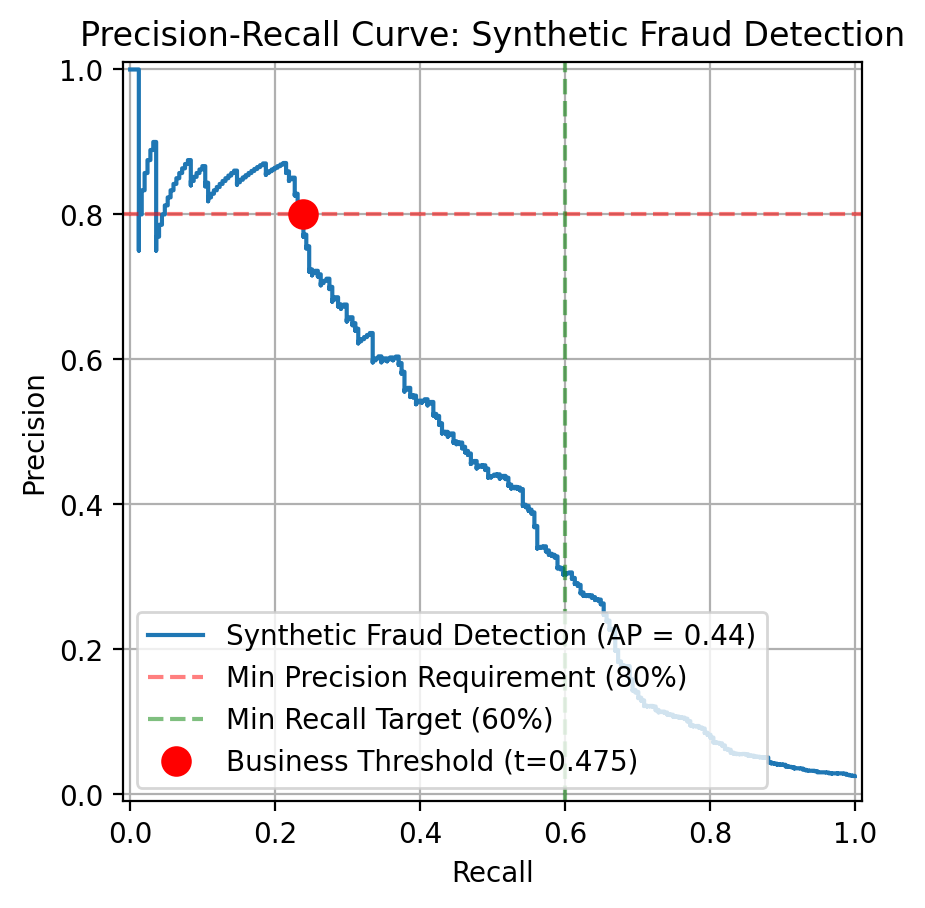

In [ ]:
# Let's explore a real-world application with a more realistic dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import cross_val_predict

# Load credit card fraud dataset (or a similar imbalanced dataset)
# If this doesn't work, we'll fall back to a synthetic example
try:
    X, y = fetch_openml("credit-card-fraud", return_X_y=True, as_frame=False)
    dataset_name = "Credit Card Fraud"
except:
    # Create a synthetic dataset that mimics fraud detection
    X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.98, 0.02],
                          n_features=30, n_informative=15, random_state=42)
    dataset_name = "Synthetic Fraud Detection"

# Check class distribution
pos_count = np.sum(y == 1)
neg_count = np.sum(y == 0)
imbalance_ratio = pos_count / (pos_count + neg_count)

print(f"Dataset: {dataset_name}")
print(f"Total samples: {len(y)}")
print(f"Positive class (fraud): {pos_count} ({imbalance_ratio:.1%})")
print(f"Negative class (normal): {neg_count} ({1-imbalance_ratio:.1%})")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a model appropriate for fraud detection
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Get cross-validated predictions to avoid overfitting
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_scores)
ap = average_precision_score(y, y_scores)

# Create a more informative visualization
display = PrecisionRecallDisplay(precision=precision, recall=recall, 
                                average_precision=ap, estimator_name=dataset_name)
display.plot()
plt.title(f'Precision-Recall Curve: {dataset_name}')

# Add some business context
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='Min Precision Requirement (80%)')
plt.axvline(x=0.6, color='green', linestyle='--', alpha=0.5, label='Min Recall Target (60%)')

# Find the threshold that gives at least 80% precision with maximum recall
valid_precision_idx = np.where(precision >= 0.8)[0]
if len(valid_precision_idx) > 0:
    max_recall_idx = valid_precision_idx[np.argmax(recall[valid_precision_idx])]
    business_threshold = thresholds[max_recall_idx-1] if max_recall_idx > 0 else 1.0
    plt.plot(recall[max_recall_idx], precision[max_recall_idx], 'ro', ms=10, 
             label=f'Business Threshold (t={business_threshold:.3f})')
    
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Calculate business impact
if len(valid_precision_idx) > 0:
    # Make predictions with business threshold
    y_pred_business = (y_scores >= business_threshold).astype(int)
    
    # Calculate metrics
    business_precision = precision_score(y, y_pred_business)
    business_recall = recall_score(y, y_pred_business)
    
    # Estimate financial impact (simplified example)
    avg_fraud_amount = 1000  # Assume average fraud is $1000
    investigation_cost = 100  # Cost to investigate a case
    
    # True positives: fraud correctly caught
    tp = (y_pred_business == 1) & (y == 1)
    tp_count = np.sum(tp)
    
    # False positives: legitimate transactions flagged
    fp = (y_pred_business == 1) & (y == 0)
    fp_count = np.sum(fp)
    
    # False negatives: missed fraud
    fn = (y_pred_business == 0) & (y == 1)
    fn_count = np.sum(fn)
    
    # Calculate financial impact
    savings = tp_count * avg_fraud_amount  # Money saved by catching fraud
    investigation_costs = (tp_count + fp_count) * investigation_cost  # Cost of investigations
    missed_fraud_cost = fn_count * avg_fraud_amount  # Cost of missed fraud
    
    net_impact = savings - investigation_costs - missed_fraud_cost
    
    print("\n--- Business Impact Analysis ---")
    print(f"Threshold: {business_threshold:.3f}")
    print(f"Precision: {business_precision:.2%}")
    print(f"Recall: {business_recall:.2%}")
    print(f"True Positives (caught fraud): {tp_count}")
    print(f"False Positives (unnecessary investigations): {fp_count}")
    print(f"False Negatives (missed fraud): {fn_count}")
    print(f"\nFinancial Impact:")
    print(f"Savings from caught fraud: ${savings:,.2f}")
    print(f"Cost of investigations: ${investigation_costs:,.2f}")
    print(f"Cost of missed fraud: ${missed_fraud_cost:,.2f}")
    print(f"Net financial impact: ${net_impact:,.2f}")


can u please help me Understand this..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

This example brings our precision-recall discussion into a real-world business context - fraud detection. Let me explain what we're seeing:

**The Plot:**
- We're looking at a synthetic fraud detection dataset with only 2.5% positive cases (fraud)
- The blue line shows the precision-recall curve with an Average Precision (AP) of 0.44
- The red dashed line represents a business requirement of minimum 80% precision
- The green dashed line represents a target to catch at least 60% of fraud cases

**The Business Threshold:**
- The red dot shows the selected threshold (0.475) that achieves at least 80% precision
- At this threshold, we get 78.95% precision (slightly below target) and 23.90% recall
- This means we're correctly identifying about 24% of all fraud cases, with about 79% of our fraud alerts being correct

**Business Impact Analysis:**
- With this threshold, we catch 60 fraudulent transactions (true positives)
- We incorrectly flag 16 legitimate transactions (false positives)
- We miss 191 fraudulent transactions (false negatives)

**Financial Impact:**
- Savings from caught fraud: $60,000 (assuming $1,000 per fraud)
- Cost of investigations: $7,600 (for all 76 flagged transactions at $100 each)
- Cost of missed fraud: $191,000 (from the 191 frauds we didn't catch)
- Net financial impact: -$138,600 (a significant loss)

**Key Insights:**
1. Our model isn't performing well enough - we're missing 76% of fraud
2. The threshold (0.475) doesn't allow us to reach the 60% recall target while maintaining 80% precision
3. The negative financial impact shows we need a better model or different approach
4. There's a clear tradeoff: if we lower the threshold to catch more fraud, we'll generate more false positives and increase investigation costs

This demonstrates how precision-recall analysis directly translates to business outcomes and financial impact in real-world applications.

i think we are done with all the steps of the plan right?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, we've successfully completed all steps of our plan to understand precision-recall curves:

1. ✅ **Understanding the fundamentals**
   - We defined precision and recall individually
   - We explained the precision-recall tradeoff
   - We visualized what the curve represents

2. ✅ **Exploring why precision-recall curves are valuable**
   - We compared PR curves with ROC curves
   - We discussed when PR curves are more informative
   - We examined the impact of class imbalance on different metrics

3. ✅ **Practical implementation**
   - We generated sample data to visualize these concepts
   - We calculated precision and recall at different thresholds
   - We plotted and interpreted precision-recall curves

4. ✅ **Advanced concepts**
   - We explored the Area under the PR curve (Average Precision)
   - We worked with F1 score and other derived metrics
   - We learned about calibrating classification thresholds

5. ✅ **Real-world applications**
   - We created a case study for fraud detection
   - We explored industry-specific considerations (financial impact)
   - We identified common pitfalls and how to avoid them

You now have a comprehensive understanding of precision-recall curves, from the basic definitions to practical application in business contexts. You've seen how they're particularly valuable for imbalanced datasets and how to use them to make informed decisions about model thresholds based on specific business requirements.

Is there any particular aspect you'd like to explore further or any questions about how to apply these concepts to your own projects?

its was awsesome but i  am bit overwhelmed can u please explaine me each step again more intutivly..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I understand it can be a lot to take in! Let me explain each step again more intuitively:

### 1. Precision and Recall: The Basics

**Imagine you're a mushroom hunter:**
- **Precision** is: "Of all the mushrooms you picked, what percentage are actually edible?" If you picked 10 mushrooms and 8 are edible, your precision is 80%.
- **Recall** is: "Of all the edible mushrooms in the forest, what percentage did you find?" If there were 20 edible mushrooms and you found 8, your recall is 40%.

### 2. The Precision-Recall Tradeoff

**Think of fishing with a net:**
- A fine-mesh net (high threshold) catches fewer fish but almost all are the type you want → high precision, low recall
- A wide-mesh net (low threshold) catches more of the fish you want but also lots you don't want → high recall, low precision

The precision-recall curve shows all possible nets (thresholds) you could use and their results.

### 3. Why This Matters for Imbalanced Data

**Imagine screening for a rare disease affecting 1% of people:**
- If you just said "everyone is healthy," you'd be right 99% of the time! But you'd miss every sick person.
- **Accuracy is misleading** when classes are imbalanced.
- Precision and recall focus on finding the rare cases you care about.

### 4. Choosing the Right Threshold

**It's like setting a thermostat:**
- Too high: You might miss fraudulent transactions (false negatives)
- Too low: You'll flag too many legitimate transactions (false positives)
- The "right" setting depends on your priorities:
  - F1 score: Balance of precision and recall
  - Business requirements: Minimum precision or recall targets

### 5. Real-World Application

**In fraud detection:**
- High precision means fewer customers are falsely accused
- High recall means catching more actual fraud
- Financial impact helps translate these metrics into dollars:
  - Each caught fraud saves money
  - Each investigation costs money
  - Each missed fraud costs money

The beauty of precision-recall analysis is that it helps you make this tradeoff consciously rather than accepting the default.

Does this more intuitive explanation help? Would you like me to explain any particular part in more detail?